# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?


<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [266]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [194]:
df['temperature'].groupby(df['temperature']).count()

temperature
96.3      1
96.4      1
96.7      2
96.8      1
96.9      1
97.0      1
97.1      3
97.2      3
97.3      1
97.4      5
97.5      2
97.6      4
97.7      3
97.8      7
97.9      5
98.0     11
98.1      3
98.2     10
98.3      5
98.4      9
98.5      3
98.6     10
98.7      8
98.8     10
98.9      2
99.0      5
99.1      3
99.2      3
99.3      2
99.4      2
99.5      1
99.9      1
100.0     1
100.8     1
Name: temperature, dtype: int64


# Is the distribution of body temperatures normal? 


Nearly all of the inferential statistics that we use rely upon something that is called the “Assumption of Normality.” In other words, these statistical procedures are based on the assumption that the value of interest (which is calculated from the sample) will exhibit a bell-curve distribution function if oodles of random samples are taken and the distribution of the calculated value (across samples) is plotted.
This is why these statistical procedures are called parametric. 

There are at least two approaches to test the Assumption of Normality.  
* The Kolmogorov-Smirnov 
* The Shapiro-Wilk Test 

Both are non-parametric tests that allow you to check the shape of a sample against a variety of known, popular shapes, including the normal distribution.


In [195]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib as mpl
import scipy 
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF


In general for a normality test, we are testing the null-hypothesis that the our data is sampled from a population that has a Normal Distribution. We assume a significance level of 0.05 or 95% for our tests.

In [196]:
# The Shapiro-Wilk normality test
x = df['temperature']
shapiro_results = scipy.stats.shapiro(x)
shapiro_results


(0.9865769743919373, 0.2331680953502655)

Since our p-value is much less than our Test Statistic, we have good evidence to not reject the null hypothesis i.e our data is sampled from a population that has a Normal Distribution.

In [197]:
# The Kolmogorov-Smirnov normality test
ks_results = scipy.stats.kstest(x, cdf='norm')
ks_results

KstestResult(statistic=1.0, pvalue=0.0)

Since our p-value is read as 0.0 (meaning it is "practically" 0 given the decimal accuracy of the test) then we have strong evidence to not reject the null-hypothesis i.e our data is sampled from a population that has a Normal Distribution.


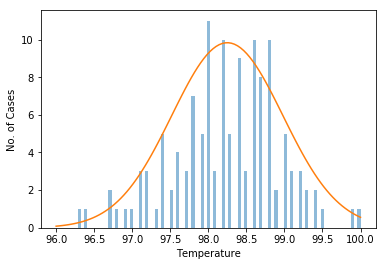

98.24923076923078

In [412]:
%matplotlib inline
bins = np.linspace(96, 100, 100)
plt.hist(df['temperature'], bins, alpha=0.5);
plt.xlabel('Temperature')
plt.ylabel('No. of Cases')
a=df['temperature']
mean= np.mean(a)
variance = np.var(a)
sigma = np.sqrt(variance)
x = np.linspace(96, 100, 100)
plt.plot(x, mlab.normpdf(x, mean, sigma)*18)
plt.show()


The  distribution of body temperatures is therefore, normal with mean of 98.249 and standard deviation of 0.7303

# Is the sample size large? Are the observations independent? 

In this section, we take a sample from df['temperature'], calculated its mean, and write this down; then take another (independent) sample and get its mean and write it down; and we do this 1000 times. 

We then see that the distribution of the means is always a perfect bell curve. This assumption is especially true at least when large samples are used, such as N ≥ 30. 

The number 30 comes from taking the worst-case scenario (i.e., a population distribution that is the farthest from normal), this being the exponential distribution. N has to be greater than or equal to 30 in order for the sampling distribution of the mean to be close enough to normal for practical purposes when the population is exponential.

Given that empirical distributions are rarely as non-normal as the exponential, the value of 30 is a conservative criterion. Observed data are never as “bad” as a true exponential and, so, N of 10 or more are almost always enough to correct any problems, but we still talk about 30 to cover every possibility.

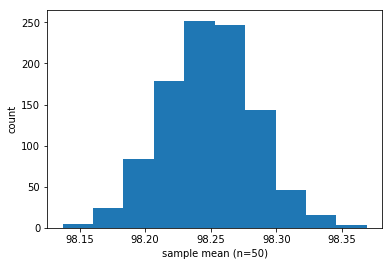

In [358]:
'''Simulate many experiments and see how much the results vary 
from one experiment to the next. '''

#Returns a random sample of items from an axis of object.
def make_sample(n):
    sample = df['temperature'].sample(n) 
    return sample
#Calculates mean of sample
def sample_stat(sample):
    return sample.mean()

def compute_sample_statistics(n, iters):
    stats = [sample_stat(make_sample(n)) for i in range(iters)]
    return np.array(stats)

#Calculates mean of 1000 random samples, each of size 100
sample_means = compute_sample_statistics(n=100, iters=1000)

plt.hist(sample_means )
plt.xlabel('sample mean (n=100)')
plt.ylabel('count')
None

In [368]:
#Calculates the Standard Error and 90% Confdence Interval
def summarize_sampling_distribution(sample_stats):
    print('Standard Error', sample_stats.std())
    print('90% Confdence Interval', np.percentile(sample_stats, [5, 95]))

summarize_sampling_distribution(sample_means)

Standard Error 0.0348771494105
90% Confdence Interval [ 98.193    98.30505]


Hence the samples are independent and large enough for Central Limit Theorem to hold.

Central Limit Theorem says that given random and independent samples of N observations each, the distribution of sample means
approaches normality as the size of N increases, regardless of the shape of the population distribution

Given random and independent samples of N observations each (taken from a normal distribution), the distribution of sample means is normal and unbiased (i.e., centered on the mean of the population), regardless of the
size of N.


# Is the true population mean really 98.6 degrees F? 

## One-sample Test   
The null hypothesis: the population mean for the treatment group is not significantly different from known or standard value c. This is stated succintly as,
 
<center>**H0: μ = c**</center>

The alternative hypothesis: the population mean is not equal to c or,
 
<center>**H1: μ ≠ c**</center>

## Paired Two-sample Test   
Use a paired sample test when there is a natural one-to-one pairing between the subjects in two treatment groups. In this case, the difference scores di = x2i - x1i can be computed and a one-sample test performed using the null hypothesis that the mean of the difference is not significantly different than zero,
 
<center>**H0: μdiff = 0**</center>

The alternative hypothesis is, 
 
<center>**H1: μdiff ≠ 0**</center>

## Independent Two-sample Test
Use the independent two-sample test when there is not a natural one-to-one pairing between the subjects in two treatment groups. The null hypothesis that the population means of the two groups are not significantly different,
 
<center>**H0: μA = μB**</center>

The alternative hypothesis is, 
 
<center>**H1: μA ≠ μB**</center>


## Selection of Test to be Employed in this Case

Since we only operate on one treatment group, we use the one-sample test. The sample size is N ≥ 30 and so we use the z-test,

<center>**z = (x - μ) / SE_mean**</center>

where, 

<center>**SE_mean = s_x / √n**</center>


## One-Sample Z-Test

In [413]:
import math
#Observed mean
x= mean # 98.249 
#Given mean of 98.6 degree F
mu= 98.6
# Estimate of standard error
n=130
n_sqrt= math.sqrt(n)
SE_mean= 0.7303/n_sqrt
z= (x-mu)/SE_mean
Prob_z= 0.9999
#The probability of getting this result by chance is p_value= 1- Prob_z
p_value = 1- Prob_z
p_value

9.999999999998899e-05

In [353]:
summarize_sampling_distribution(sample_means)

Standard Error 0.0349164548029
90% Confdence Interval [ 98.193  98.306]


## Conclusion 

Since the P-value is 0.0099% or approximately 0.01%, which is much less than 5%, we reject the Null hypothesis (that says the population mean for the treatment group is not significantly different from the known or standard value of 98.6 degree F). 

From the section above where we Simulate many experiments and see how much the results vary from one experiment to the next, we can conclude that the mean normal body temperature is in the interval [98.193,  98.306] with a 90% confidence interval.

## One-Sample Z-Test

In [364]:
t=z
#using the t-distribution table for 129 degrees of freedom one-sided
Prob_t= 0.9995 #percent
p_value_tDist= 1-Prob_t
p_value_tDist

0.04999999999999449

Since the P-value is 0.04999% or approximately 0.05%, which is much less than 5%, we reject the Null hypothesis (that says the population mean for the treatment group is not significantly different from the known or standard value of 98.6 degree F). The lower probability reported by the p-value here is due to the fact that we consider a t-distribution that does not assume normal distribution of sample means as in the case of the z-score which assumes normality in distribution of sample means.

## At what temperature should we consider someone's temperature to be "abnormal"? 


In [395]:
SE=sample_means.std()
array=np.percentile(sample_means, [5, 95])
list1= array.tolist()
list1
    
lower_limit= list1[0]- list1[0]*SE
upper_limit= list1[1]+ list1[1]*SE

In [396]:
lower_limit

94.768308067937994

In [397]:
upper_limit

101.73364991665346

Based on the above confidence interval nd standard error, anything below lower_limit and anything above upper_limit is considered 'abnormal' body temperature

## Is there a significant difference between males and females in normal temperature? 

In [326]:
a= df.groupby(['gender','temperature'],as_index=False).count()
b= a.iloc[0:26,0:3]
temp= b['temperature'].values.tolist()
count=b['heart_rate'].values.tolist()
c= a.iloc[27:,0:3]
temp1= c['temperature'].values.tolist()
count1=c['heart_rate'].values.tolist()

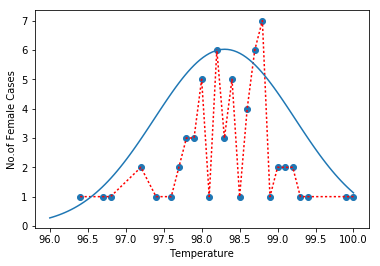

In [335]:
%matplotlib inline
import plotly.graph_objs as go
bins = np.linspace(96, 100, 10)
plt.scatter(temp, count);
plt.plot(temp, count, 'r:');
mean= np.mean(temp)
variance = np.var(temp)
sigma = np.sqrt(variance)
x = np.linspace(96, 100, 100)
plt.plot(x, mlab.normpdf(x, mean, sigma)*14)
plt.xlabel('Temperature')
plt.ylabel('No.of Female Cases')


In [338]:
[mean, sigma] #test statistics for women

[98.303846153846152, 0.92714647802597838]

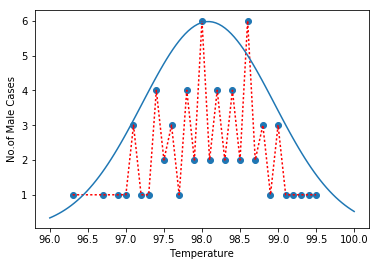

In [334]:
%matplotlib inline
import plotly.graph_objs as go
bins = np.linspace(96, 100, 10)
plt.scatter(temp1, count1);
plt.plot(temp1, count1, 'r:');
mean1= np.mean(temp1)
variance1 = np.var(temp1)
sigma1 = np.sqrt(variance1)
x1 = np.linspace(96, 100, 100)
plt.plot(x1, mlab.normpdf(x1, mean1, sigma1)*13)
plt.xlabel('Temperature')
plt.ylabel('No.of Male Cases')


In [336]:
[mean1, sigma1] #mean Male body tem

[98.08275862068966, 0.86784273385305577]

## Paired-sample t-test 
There is a natural one-to-one pairing between the subjects in the two treatment groups. In this case, the difference scores di = x2i - x1i can be computed and a one-sample test performed using the null hypothesis that the mean of the difference is not significantly different than zero: 
 
H0: μdiff = 0

The alternative hypothesis is 
 
H0: μdiff ≠ 0


In [403]:
#Observed mean
x1= mean
x2= mean1
#Given mean of 98.6 degree F
var1= variance
var2= variance1
n1=26
n2=29
# Estimate of standard error
SE_mean= math.sqrt(var1/n1+var2/n2)
t= (x1-x2)/SE_mean
t

0.77210425589134091

In [411]:
Prob_t2= 0.77
#The probability of getting this result by chance is p_value= 1- Prob_z
p_value2 = 1- Prob_t2
p_value2

0.22999999999999998

Since the P-value is 22.99%, which is much larger than 5%, we reject the alternative hypothesis and accept the Null hypothesis (the mean of the difference is not significantly different than zero). We can conclude that though the population mean of normal body temperature may differ from the stated mean of 96.8 degree F, there is no significant difference in normal body temperature between males and females. 